In [2]:
from sdm.utils import set_project_wd
set_project_wd()

Current Working Directory: /Users/work/Data Science/sheffield-bats


In [3]:
import xarray as xr
import numpy as np
import rioxarray as rxr

In [5]:
def load_predictions() -> xr.Dataset:
    """
    Load the model predictions array.

    This function loads the tif and processes it to be in the correct format for the dashboard.
    """
    path = "dashboard/data/predictions_cog.tif"
    predictions = rxr.open_rasterio(path)
    predictions.coords["band"] = list(predictions.attrs["long_name"])
    # Set the nodata appropriately
    nodata = -1
    predictions = predictions.where(predictions >= 0, np.nan)

    # convert to a dataset to allow band name indexing
    predictions = predictions.to_dataset(dim="band")
    # Convert back to 0-1
    predictions = predictions / 100

    return predictions

from pipelines.load_boundary import load_south_yorkshire
south_yorkshire = load_south_yorkshire()
predictions = load_predictions()

# Clip the predictions to the boundary
predictions = predictions.rio.clip(south_yorkshire.geometry)
# plot a layer
predictions

<xarray.Dataset> Size: 51MB
Dimensions:                             (x: 632, y: 401)
Coordinates:
  * x                                   (x) float64 5kB 4.119e+05 ... 4.751e+05
  * y                                   (y) float64 3kB 3.787e+05 ... 4.187e+05
    spatial_ref                         int64 8B 0
Data variables: (12/25)
    Pipistrellus pipistrellus_Roost     (y, x) float64 2MB nan nan ... nan nan
    Plecotus auritus_Roost              (y, x) float64 2MB nan nan ... nan nan
    Myotis nattereri_Foraging           (y, x) float64 2MB nan nan ... nan nan
    Plecotus auritus_All                (y, x) float64 2MB nan nan ... nan nan
    Nyctalus noctula_Roost              (y, x) float64 2MB nan nan ... nan nan
    Myotis daubentonii_All              (y, x) float64 2MB nan nan ... nan nan
    ...                                  ...
    Plecotus auritus_Foraging           (y, x) float64 2MB nan nan ... nan nan
    Myotis brandtii_All                 (y, x) float64 2MB nan nan ... nan nan
    Pipistrellus pygmaeus_All           (y, x) float64 2MB nan nan ... nan nan
    Myotis mystacinus_Roost             (y, x) float64 2MB nan nan ... nan nan
    Myotis mystacinus_All               (y, x) float64 2MB nan nan ... nan nan
    Pipistrellus pipistrellus_Foraging  (y, x) float64 2MB nan nan ... nan nan
Attributes:
    AREA_OR_POINT:  Area
    scale_factor:   1.0
    add_offset:     0.0
    long_name:      ('Pipistrellus pipistrellus_Roost', 'Plecotus auritus_Roo...

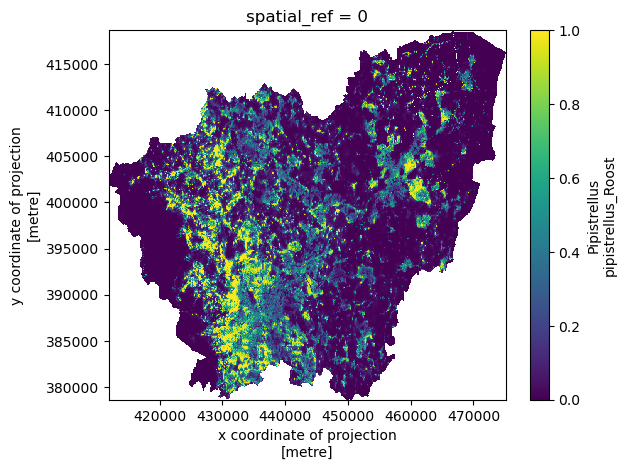

In [8]:
predictions["Pipistrellus pipistrellus_Roost"].plot.imshow()

In [13]:
species_avgs = predictions.to_dataframe().mean()
species_avgs.to_frame()
# split foraging and roosting
foraging = species_avgs.filter(like="Foraging")
roosting = species_avgs.filter(like="Roost")
foraging.to_frame().sort_values(0, ascending=False)

,0
Pipistrellus pipistrellus_Foraging,0.196319
Nyctalus noctula_Foraging,0.134550
Nyctalus leisleri_Foraging,0.134153
Pipistrellus pygmaeus_Foraging,0.118379
Plecotus auritus_Foraging,0.092135
Myotis mystacinus_Foraging,0.069304
Myotis nattereri_Foraging,0.056553
Myotis daubentonii_Foraging,0.048702


In [14]:
roosting.to_frame().sort_values(0, ascending=False)

,0
Nyctalus noctula_Roost,0.218096
Pipistrellus pipistrellus_Roost,0.185500
Nyctalus leisleri_Roost,0.160265
Myotis daubentonii_Roost,0.118567
Plecotus auritus_Roost,0.104637
Pipistrellus pygmaeus_Roost,0.087614
Myotis nattereri_Roost,0.080625
Myotis mystacinus_Roost,0.031741
